# Project: Investigate a Dataset - [No-Show Appointment]¶


Table of Contents
Introduction
Data Wrangling
Exploratory Data Analysis
Conclusions

# Introduction

The dataset(No-show-appointments) used in this report was originally gotten from Kaggle and it collects the information of over 100k medical appointments in Brazil. I will be comunicating my findings as to why a patient decides to show up or not. In this dataset, there are 110527 enteries and 14 columns:

Patient Id : The unique id of the patient.

Appointment Id : The unique identification of appointment for the patient.

Gender : The sex of the patient

ScheduledDay: The date scheduled for the medical appointment

AppointmentDay : The day the patient shows up for the appointment.

Age: The age of the patient

Neighbourhood: The neighbourhood of the hospital of appointment.

Scholarship: This explains whether a patient enrolled in the brazillian welfare program called Bolsa Familia or not. There are 2 unique values (0 & 1) in this column. 0 signifies that patient did not enroll for the welfare scheme while 1 means the patient is under the welfare scheme.

Hipertension : This column explains whether a patient is hypertensive or not.

Diabetes: This column has (0 & 1) as unique values, 0 means the patient is not diabetic and 1 indicates that the patient is .

Alcoholism: Is the patient an alcoholic or not.

Handcap: Is the patient disabled or not.

SMS_received: Was the patient notified of the appointment prior to the date.

No-Show : This column explains if the patient actually shows up for the appointment or not. Response Yes indicates that the patient did not show up while No means the patient showed up.

Questions :

1) Is scholarship a determinant factor as to why the patient decides to show up or not ? 2) Does receiving an sms notification determines if the patient shows up or not ? 3) Does being an alcoholic determines if a patient will keep to his appointment?

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv ('no_show.csv')


# Data Wrangling 

In [6]:
#show the first 5 rows of my dataset to ascertain if I have right type of data at a glance 

df.head()



,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
#Finding the summary of the dataset and to also look out for missing values 
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [8]:
#Check for duplicated data.

sum(df.duplicated())

0

No duplicated data was recorded.

In [9]:
#Check for the statistical summary of the dataset

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The statiscal summary shows the mean age range of the patients is 37 years of age. The least is -1, which is an abnormality as we cant have age in (-). I will be fixing this and also drop some columns (Hipertension, diabetes, Neighbourhood and handcap) as I do not need them for my final analysis.

In [10]:
#Check for the abnormal age.

negative_age = df[df.Age<0]
negative_age

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


And there we have it, the patient with the appointmentID 577510 needs to be dropped.

In [12]:
#drop negative_age

df.drop([99831],axis = 0, inplace = True)

In [13]:
#confirm that negative_age is dropped

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110526 non-null  float64
 1   AppointmentID   110526 non-null  int64  
 2   Gender          110526 non-null  object 
 3   ScheduledDay    110526 non-null  object 
 4   AppointmentDay  110526 non-null  object 
 5   Age             110526 non-null  int64  
 6   Neighbourhood   110526 non-null  object 
 7   Scholarship     110526 non-null  int64  
 8   Hipertension    110526 non-null  int64  
 9   Diabetes        110526 non-null  int64  
 10  Alcoholism      110526 non-null  int64  
 11  Handcap         110526 non-null  int64  
 12  SMS_received    110526 non-null  int64  
 13  No-show         110526 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


Entries is now 110526,a row has been dropped.

In [14]:
#Check for the type of data
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

The scheduled Day and appointment day are showing as strings, this need to be fixed.

In [15]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [16]:
#Confirm that the change has been effected
df.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

The datepart data type is fixed.

In [17]:
def uniqueValues(AppointmentDay):
    unVal = set()
    for appointment in appointments :
        unVal.add(appointment[AppointmentDay])
        return UnVal

In [18]:
df.nunique()

PatientId          62298
AppointmentID     110526
Gender                 2
ScheduledDay      103548
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [19]:
#drop columns that are not needed for my analysis
df.drop(['Hipertension','Neighbourhood','Handcap'], axis = 1, inplace = True )


In [20]:
#Confirm that the extra columns are dropped
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Diabetes,Alcoholism,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,0,1,0,0,No


The extraneous columns have been dropped.

In [21]:
#renaming the No-show column to make my analysis easier
df.rename (columns = {'No-show':'No_show'}, inplace = True)

In [22]:
#Confirm that the last column has been renamed
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Diabetes,Alcoholism,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,0,1,0,0,No


# Exploratory Data Analysis

In [34]:
#Crearting a mask for patients that showed up and those that didnt show up.
Show_up = df.No_show == 'No'
not_show_up = df.No_show == 'Yes'

In [ ]:
def #

Text(0, 0.5, 'Count of Records')

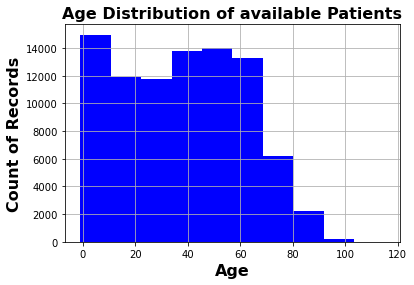

In [24]:
df.Age[Show_up].hist(color = 'blue')
plt.title ('Age Distribution of available Patients',fontsize = 16,weight = 'bold')
plt.xlabel ('Age',fontsize = 16,weight = 'bold')
plt.ylabel ('Count of Records',fontsize = 16,weight = 'bold')

Text(0, 0.5, 'Count of Records')

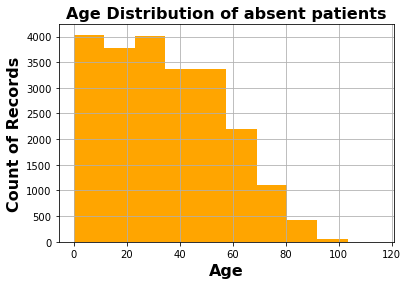

In [25]:
df.Age[not_show_up].hist(color = 'orange')
plt.title ('Age Distribution of absent patients', fontsize = 16, weight = 'bold')
plt.xlabel ('Age',fontsize = 16, weight = 'bold')
plt.ylabel ('Count of Records',fontsize = 16, weight = 'bold')

The distribution of age is right skewed for both available and non available patients, with the majority of them within the ages of 0-40

# Research Question 1 (Is scholarship a determinant factor as to why the patient decides to show up or not ?)

Text(0, 0.5, 'Occurrence')

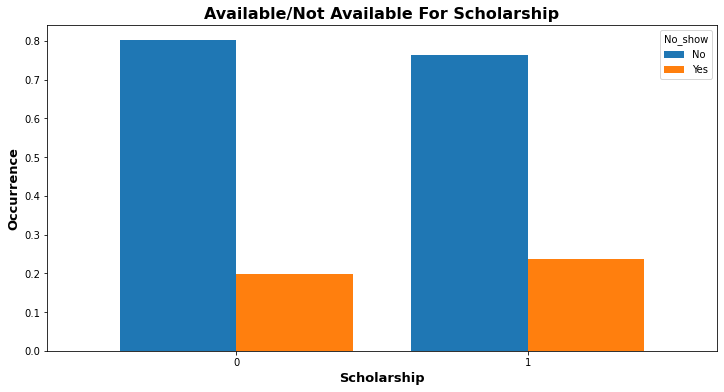

In [27]:
#Analysing Scholarship as a determinant factor
df['No_show'].groupby(df['Scholarship']).value_counts(normalize=True).unstack('No_show').plot(kind='bar',rot=0,width=0.8, figsize=(12,6))
plt.title("Available/Not Available for {}".format('Scholarship').title(), fontsize = 16, weight = "bold")
plt.xlabel('Scholarship',fontsize = 13,weight = 'bold')
plt.ylabel("Occurrence",fontsize = 13,weight = 'bold')

Over 80% of patients that didnt enroll for the welfare scheme by the government  showed up for their appointment.
Also, about 80% of those that were awarded schlorship also showed up for their appointment.

20% of patients that didnt enroll showed up for their appoinment while over 20% of enrollee did not show up

# Research Question 2 (Does receiving an sms notification determines if a patient shows up or not ?)

Text(0, 0.5, 'Occurrence')

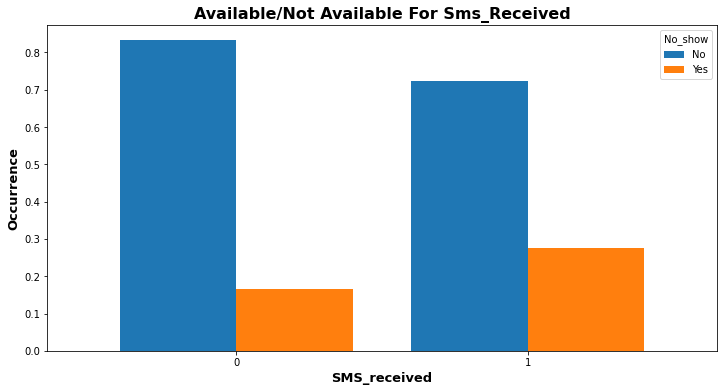

In [28]:
#Analysing SMS_received as a determinant factor
df['No_show'].groupby(df['SMS_received']).value_counts(normalize=True).unstack('No_show').plot(kind='bar',rot=0,width=0.8, figsize=(12,6))
plt.title("Available/Not Available for {}".format('SMS_received').title(), fontsize = 16, weight = "bold")
plt.xlabel('SMS_received',fontsize = 13,weight = 'bold')
plt.ylabel("Occurrence",fontsize = 13,weight = 'bold')

More than 80% of patients that did not receive SMS notification showed up for their appointment while about 20% did not show up. 

On the other hand, about 75% of patients that received SMS did show up, and about 30% did not.

# Research Question 3 (Does being an alcoholic determines if a patient will keep to his appointment or not?)

Text(0, 0.5, 'Occurrence')

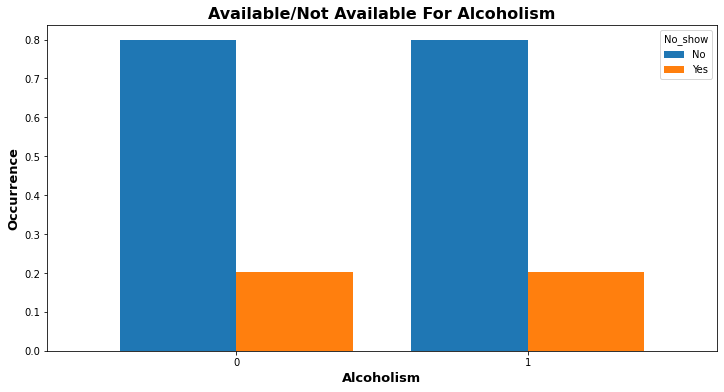

In [29]:
#Analysing Alcoholism as a determinant factor
df['No_show'].groupby(df['Alcoholism']).value_counts(normalize=True).unstack('No_show').plot(kind='bar',rot=0,width=0.8, figsize=(12,6))
plt.title("Available/Not Available for {}".format('Alcoholism').title(), fontsize = 16, weight = "bold")
plt.xlabel('Alcoholism',fontsize = 13,weight = 'bold')
plt.ylabel("Occurrence",fontsize = 13,weight = 'bold')

80% of both alcholics and non alcholics showed up for their appointment and about 20% of both did not.

# Conclusions

From the explanatory analysis , it is clear that none of the questions I raised at the begining determines why a patient failed to show up for his or her appointment.

The percentage of people showing up and those that did not based on the factors I listed are pretty close.

There are definitely other reasons why the patients couldnt make it. The hospital might be too far or they had other pressing engagement.

It's also worthy of note that 80% of patients struggling with alcoholism still showed up for their appointment.

# Limitations

Some of the limitations I encountered in my analysis is not enough information. Take for instance, the patients that didnt show up but received SMS. There is no way to ascertain when the SMS was sent, the time could have affected the outcome.